# Predicting Bike Rentals in Washington, D.C. in given hours

The data contains 17380 rows, each of which represents the number of bike rentals for a single hour of a single day from 01/01/2011 to 31/12/2012.

Here are the descriptions for the relevant columns given by Dataquest:

**instant** - A unique sequential ID number for each row

**dteday** - The date of the rentals

**season** - The season in which the rentals occurred

**yr** - The year the rentals occurred

**mnth** - The month the rentals occurred

**hr** - The hour the rentals occurred

**holiday** - Whether or not the day was a holiday

**weekday** - The day of the week (as a number, 0 to 7)

**workingday** - Whether or not the day was a working day

**weathersit** - The weather (as a categorical variable)

**temp** - The temperature, on a 0-1 scale

**atemp** - The adjusted temperature

**hum** - The humidity, on a 0-1 scale

**windspeed** - The wind speed, on a 0-1 scale

**casual** - The number of casual riders (people who hadn't previously signed up with the bike sharing program)

**registered** - The number of registered riders (people who had already signed up)

**cnt** - The total number of bike rentals (casual + registered)

In [1]:
import pandas as pd
import numpy as np

bike_rentals = pd.read_csv("/Users/apple/Downloads/python_dataquest/Guided Project_ Predicting Bike Rentals/bike_rental_hour.csv")

To start with, let's have a quick look at the first and last few rows as well as essential information of the data to imagine how the data looks like as well as get to know data types of columns and the number of non-null values.

In [2]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike_rentals.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [4]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Then, let's examine the distribution of total of bike rentals through a histogram

<AxesSubplot:>

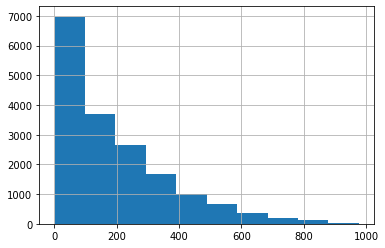

In [5]:
bike_rentals["cnt"].hist()

From the graph, it is evident that the number of bike rentals for each hour mostly falls between 0 and 100.

Next, we'll define a new function called "assign_label" to categorize hours so that the prediction model can make better predictions.

The function will takes in a numeric value for an hour, and returns:

**1** if the hour is from **6 to 12** (morning)

**2** if the hour is from **12 to 18** (afternoon)

**3** if the hour is from **18 to 24** (evening)

**4** if the hour is from **0 to 6** (night)

In [6]:
def assign_label(number):
    if number >= 6 and number < 12:
        return 1
    elif number >= 12 and number < 18:
        return 2
    elif number >= 18 and number < 24:
        return 3
    else:
        return 4
        

Now, we will apply the function above to each item in the "hr" column and assign the result to the new column named "time_label".

In [7]:
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [8]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


Next, we will split the data into training and testing sets.

The training set named "train" will contain 80% of the rows in the data.

The remaining number of rows in the data will belong to the testing test named "test".

In [9]:
train = bike_rentals.sample(frac = 0.8)

In [10]:
test = bike_rentals[~bike_rentals.index.isin(train.index)]

In [11]:
features = bike_rentals.columns.tolist()
features

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'time_label']

After getting a list of column names, we are going to remove columns which might make the model make bad predictions.

Here are the columns will be removed:

**"cnt":** because this is our prediction target

**"casual", "registered":** because these columns constitute the **"cnt"** column, which is our prediction target

**"dteday"**: because it is irrelevant to use dates in the past to predict the number of bike rentals in the future. In terms of time variables, we already have the **"yr"** and **"mnth"** columns, which are more relevant to the prediction than this column

In [12]:
features.remove("cnt")
features.remove("casual")
features.remove("registered")
features.remove("dteday")

In [13]:
features

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

This is the list of features that we will use to predict our target variable which is the **"cnt"** column

Next, we try using the method of Linear Regression to train a machine learning algorithm on the training set and make predictions on the testing set.

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import mean_squared_error


In [15]:
target = "cnt"

In [16]:
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mse = mean_squared_error(test[target], predictions)
mse

18179.137087412393

After training the training test and making predictions on the testing test, we examine the mean squared error metric (mse) and realize that the mse is quite high, meaning that our chosen prediction model did not work well.

Therefore, we will try another prediction method called "Decision Tree Regression"

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(min_samples_leaf=5)

tree.fit(train[features], train[target])
predictions2 = tree.predict(test[features])
mse2 = mean_squared_error(test[target], predictions2)
mse2

2617.1757584083216

After applying the "Decision Tree algorithm", we realize that the mse is significantly reduced.

However, we will try another prediction method called "Random Forest Regression", which improves on the decision tree algorithm, to see whether the mse will decrease afterwards

In [18]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(min_samples_leaf=5)
forest.fit(train[features], train[target])
predictions3 = forest.predict(test[features])
mse3 = mean_squared_error(test[target], predictions3)
mse3

1802.5320269305514

After applying the "Random Forest algorithm", we realize that the mse decreases greatly.


In [19]:
predictions = pd.Series(predictions3)

In [20]:
test_prediction = test[features].copy()

In [21]:
test_prediction = test_prediction.reset_index()

In [22]:
test_prediction["predictions"] = predictions

In [23]:
test_prediction

,index,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,time_label,predictions
0,0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,4,32.546336
1,11,12,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,1,66.153155
2,23,24,1,0,1,23,0,6,0,2,0.46,0.4545,0.88,0.2985,3,60.515882
3,24,25,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985,4,57.755417
4,25,26,1,0,1,1,0,0,0,2,0.44,0.4394,0.94,0.2537,4,42.315531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,17368,17369,1,1,12,13,0,1,1,2,0.26,0.2576,0.44,0.1642,2,203.920646
3472,17372,17373,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,2,181.928535
3473,17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,3,182.758019
3474,17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,3,177.068809


This table contains feature columns from the testing test and the prediction column which is derived from those feature columns.